In [1]:
# Import Dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools
# import plotly.io as pio

from config import api_key 
plotly.tools.set_credentials_file(username='billeveloff', api_key=api_key)

In [2]:
# Import our data into pandas from CSV
hate_crime = 'hate_crime_copy.csv'
hate_crime_df = pd.read_csv(hate_crime, low_memory=False)

hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [3]:
hate_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194194 entries, 0 to 194193
Data columns (total 28 columns):
INCIDENT_ID                 194194 non-null int64
DATA_YEAR                   194194 non-null int64
ORI                         194194 non-null object
PUB_AGENCY_NAME             194194 non-null object
PUB_AGENCY_UNIT             5219 non-null object
AGENCY_TYPE_NAME            194194 non-null object
STATE_ABBR                  194194 non-null object
STATE_NAME                  194194 non-null object
DIVISION_NAME               194194 non-null object
REGION_NAME                 194194 non-null object
POPULATION_GROUP_CODE       194194 non-null object
POPULATION_GROUP_DESC       194194 non-null object
INCIDENT_DATE               194194 non-null object
ADULT_VICTIM_COUNT          29915 non-null float64
JUVENILE_VICTIM_COUNT       29813 non-null float64
TOTAL_OFFENDER_COUNT        194194 non-null int64
ADULT_OFFENDER_COUNT        28704 non-null float64
JUVENILE_OFFENDER_COUNT    

In [4]:
hate_crime_df = hate_crime_df.replace(to_replace = "NB",
                                         value="NE")

In [5]:
# Group by values in "STATE_ABBR"
state_group = hate_crime_df.groupby('STATE_ABBR')

# Count how many times each state appears in group
count_states = state_group['STATE_ABBR'].count()

count_states.head()

STATE_ABBR
AK      211
AL      199
AR     1032
AZ     6104
CA    32816
Name: STATE_ABBR, dtype: int64

In [6]:
hate_crime_df

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
5,3018,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S
6,3019,1991,AR0600200,Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,School/College,Anti-White,Individual,S,S
7,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
8,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
9,3020,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S


In [7]:
# count_states.plot(kind='bar', align='center', alpha=0.7)
# plt.title('Hate Crime Offenses by US State 1991-2017', fontsize=30)
# plt.xlabel('States', fontsize=24)
# plt.ylabel('Number of Offenses', fontsize=24, rotation=90) 
# plt.xticks(fontsize=18, rotation=0)
# plt.yticks(fontsize=, rotation=0)

# plt.tight_layout()
# plt.savefig('hate_crime_by_state.png')
# plt.show()

In [8]:
# Create a bar chart based off of the group series from before
# state_chart = count_states.plot(kind='bar')

# plt.rcParams['figure.figsize'] = 200,100


# # Set the xlabel and ylabel using class methods
# state_chart.set_xlabel("States by Abbreviation")
# state_chart.set_ylabel("Number of Hate Crimes") 

# plt.tight_layout()
# plt.show()

In [9]:
# Group by values in "STATE_ABBR"
year_group = hate_crime_df.groupby('DATA_YEAR')

# Count how many times each state appears in group
count_year = year_group['DATA_YEAR'].count()

count_year

DATA_YEAR
1991    4589
1992    6667
1993    7608
1994    5954
1995    7950
1996    8790
1997    8107
1998    7902
1999    7943
2000    8219
2001    9730
2002    7485
2003    7545
2004    7684
2005    7411
2006    7716
2007    7625
2008    8039
2009    6612
2010    6628
2011    6299
2012    6593
2013    6044
2014    5597
2015    5860
2016    6263
2017    7334
Name: DATA_YEAR, dtype: int64

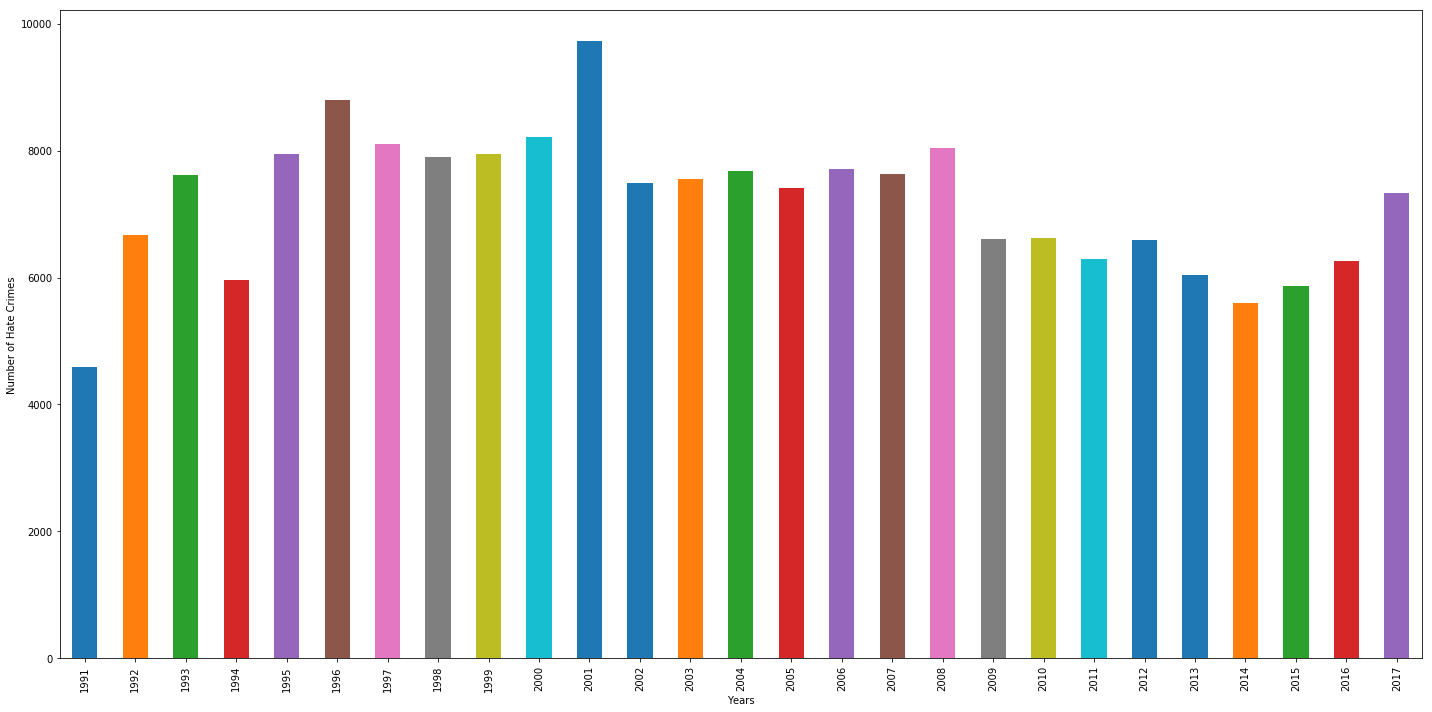

In [11]:
state_chart = count_year.plot(kind='bar')

plt.rcParams['figure.figsize'] = 20,10

state_chart.set_xlabel("Years")
state_chart.set_ylabel("Number of Hate Crimes") 

plt.tight_layout()
plt.show()

In [12]:
# hate_crime_cleaned = hate_crime_df.copy()
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [13]:
hate_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194194 entries, 0 to 194193
Data columns (total 28 columns):
INCIDENT_ID                 194194 non-null int64
DATA_YEAR                   194194 non-null int64
ORI                         194194 non-null object
PUB_AGENCY_NAME             194194 non-null object
PUB_AGENCY_UNIT             5219 non-null object
AGENCY_TYPE_NAME            194194 non-null object
STATE_ABBR                  194194 non-null object
STATE_NAME                  194194 non-null object
DIVISION_NAME               194194 non-null object
REGION_NAME                 194194 non-null object
POPULATION_GROUP_CODE       194194 non-null object
POPULATION_GROUP_DESC       194194 non-null object
INCIDENT_DATE               194194 non-null object
ADULT_VICTIM_COUNT          29915 non-null float64
JUVENILE_VICTIM_COUNT       29813 non-null float64
TOTAL_OFFENDER_COUNT        194194 non-null int64
ADULT_OFFENDER_COUNT        28704 non-null float64
JUVENILE_OFFENDER_COUNT    

In [14]:
#delete column that do not equal the majority of coloumns, whose respective entries total 194194 
# hate_crime_cleaned = hate_crime_df.drop(['PUB_AGENCY_NAME'], axis=1, inplace=True)
hate_crime_deleted = hate_crime_df.drop(['PUB_AGENCY_UNIT','ADULT_VICTIM_COUNT','JUVENILE_VICTIM_COUNT','ADULT_OFFENDER_COUNT',
                                         'JUVENILE_OFFENDER_COUNT','ADULT_OFFENDER_COUNT','OFFENDER_RACE',
                                         'OFFENDER_ETHNICITY','TOTAL_INDIVIDUAL_VICTIMS'], axis=1, inplace=True)

In [15]:
hate_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194194 entries, 0 to 194193
Data columns (total 20 columns):
INCIDENT_ID              194194 non-null int64
DATA_YEAR                194194 non-null int64
ORI                      194194 non-null object
PUB_AGENCY_NAME          194194 non-null object
AGENCY_TYPE_NAME         194194 non-null object
STATE_ABBR               194194 non-null object
STATE_NAME               194194 non-null object
DIVISION_NAME            194194 non-null object
REGION_NAME              194194 non-null object
POPULATION_GROUP_CODE    194194 non-null object
POPULATION_GROUP_DESC    194194 non-null object
INCIDENT_DATE            194194 non-null object
TOTAL_OFFENDER_COUNT     194194 non-null int64
VICTIM_COUNT             194194 non-null int64
OFFENSE_NAME             194194 non-null object
LOCATION_NAME            194194 non-null object
BIAS_DESC                194194 non-null object
VICTIM_TYPES             194194 non-null object
MULTIPLE_OFFENSE         1941

In [16]:
hate_crime_rev=hate_crime_df[['DATA_YEAR','ORI','PUB_AGENCY_NAME',
                            'STATE_ABBR','STATE_NAME','DIVISION_NAME',
                            'REGION_NAME','INCIDENT_DATE','OFFENSE_NAME',
                            'LOCATION_NAME','BIAS_DESC','VICTIM_TYPES']]
hate_crime_rev.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR0040200,Rogers,AR,Arkansas,West South Central,South,31-Aug-91,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,1991,AR0290100,Hope,AR,Arkansas,West South Central,South,19-Sep-91,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,4-Jul-91,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual
3,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,24-Dec-91,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,23-Dec-91,Aggravated Assault,Service/Gas Station,Anti-White,Individual


In [17]:
hate_crime_rev["BIAS_DESC"] = hate_crime_rev["BIAS_DESC"].replace(
    {"Anti-Gay (Male)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": 
    "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)", 
    "Anti-Lesbian (Female)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Bisexual":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Transgender":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gender Non-Conforming":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-White":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Black or African American;Anti-Lesbian":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Jewish;Anti-White":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Jewish":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Black or African American;Anti-Transgender":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Black or African American;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Lesbian (Female);Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Jewish;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group);Anti-White":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Transgender":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Transgender;Anti-White":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Transgender":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Transgender;Anti-White":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Female;Anti-Gay (Male)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Lesbian (Female)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Multiple Races, Group":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Other Race/Ethnicity/Ancestry":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Lesbian (Female);Anti-White":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Female;Anti-White":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Physical Disability":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Heterosexual":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Asian;Anti-Gay (Male)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Jewish;Anti-Lesbian (Female);Anti-White":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Multiple Religions, Group;Anti-Transgender":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Black or African American;Anti-Gay (Male);Anti-White":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Jewish;Anti-Transgender":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Bisexual;Anti-Heterosexual":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Heterosexual;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Lesbian (Female);Anti-Other Religion":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Black or African American;Anti-Jewish;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Islamic (Muslim)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group);Anti-Physical Disability":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Lesbian (Female);Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Lesbian (Female);Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Bisexual;Anti-Gay (Male)":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Gay (Male);Anti-Mental Disability":"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)"})
hate_crime_rev

C:\Users\beveloff\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,DATA_YEAR,ORI,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR0040200,Rogers,AR,Arkansas,West South Central,South,31-Aug-91,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,1991,AR0290100,Hope,AR,Arkansas,West South Central,South,19-Sep-91,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,4-Jul-91,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual
3,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,24-Dec-91,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,23-Dec-91,Aggravated Assault,Service/Gas Station,Anti-White,Individual
5,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,27-Jul-91,Robbery,Grocery/Supermarket,Anti-White,Individual
6,1991,AR0600200,Little Rock,AR,Arkansas,West South Central,South,14-Nov-91,Aggravated Assault,School/College,Anti-White,Individual
7,1991,AR0600300,North Little Rock,AR,Arkansas,West South Central,South,10-Jul-91,Aggravated Assault;Murder and Nonnegligent Man...,Residence/Home,Anti-White,Individual
8,1991,AR0600300,North Little Rock,AR,Arkansas,West South Central,South,6-Oct-91,Intimidation,Residence/Home,Anti-White,Individual
9,1991,AR0600300,North Little Rock,AR,Arkansas,West South Central,South,4-Oct-91,Robbery,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual


In [18]:
#Replace selected entries to abbreviate/shorten for visualizations
hate_crime_rev2 = hate_crime_rev.replace(to_replace = "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
                                         value="Anti-LGBT")

In [19]:
#Replace selected entries to abbreviate/shorten for visualizations
hate_crime_rev2 = hate_crime_rev2.replace(to_replace = "Anti-Other Race/Ethnicity/Ancestry",
                                         value="Anti-Other Race/Ethn/Ances")

In [20]:
#Replace selected entries to abbreviate/shorten for visualizations
hate_crime_rev2 = hate_crime_rev2.replace(to_replace = "Anti-Hispanic or Latino",
                                         value="Anti-Hispanic")

In [21]:
#Replace selected entries to abbreviate/shorten for visualizations
hate_crime_rev2 = hate_crime_rev2.replace(to_replace = "Anti-Black or African American",
                                         value="Anti-African American")

In [22]:
#Replace selected entries to abbreviate/shorten for visualizations
hate_crime_rev2 = hate_crime_rev2.replace(to_replace = "Anti-Arab",
                                         value="Anti-Islamic (Muslim)")

hate_crime_rev2

,DATA_YEAR,ORI,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR0040200,Rogers,AR,Arkansas,West South Central,South,31-Aug-91,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-African American,Individual
1,1991,AR0290100,Hope,AR,Arkansas,West South Central,South,19-Sep-91,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,4-Jul-91,Aggravated Assault,Residence/Home,Anti-African American,Individual
3,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,24-Dec-91,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,23-Dec-91,Aggravated Assault,Service/Gas Station,Anti-White,Individual
5,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,27-Jul-91,Robbery,Grocery/Supermarket,Anti-White,Individual
6,1991,AR0600200,Little Rock,AR,Arkansas,West South Central,South,14-Nov-91,Aggravated Assault,School/College,Anti-White,Individual
7,1991,AR0600300,North Little Rock,AR,Arkansas,West South Central,South,10-Jul-91,Aggravated Assault;Murder and Nonnegligent Man...,Residence/Home,Anti-White,Individual
8,1991,AR0600300,North Little Rock,AR,Arkansas,West South Central,South,6-Oct-91,Intimidation,Residence/Home,Anti-White,Individual
9,1991,AR0600300,North Little Rock,AR,Arkansas,West South Central,South,4-Oct-91,Robbery,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual


In [23]:
top_ten = hate_crime_rev2.groupby(['BIAS_DESC'])[["DATA_YEAR"]] \
                             .count() \
                             .reset_index()\
                             .sort_values(['DATA_YEAR'], ascending=False) \
                             .head(10)

bias_list_t10=list(top_ten['BIAS_DESC'])
print(bias_list_t10)

['Anti-African American', 'Anti-LGBT', 'Anti-Jewish', 'Anti-White', 'Anti-Hispanic', 'Anti-Other Race/Ethn/Ances', 'Anti-Asian', 'Anti-Multiple Races, Group', 'Anti-Islamic (Muslim)', 'Anti-Other Religion']


In [24]:
top_five = hate_crime_rev2.groupby(['BIAS_DESC'])[["DATA_YEAR"]] \
                             .count() \
                             .reset_index()\
                             .sort_values(['DATA_YEAR'], ascending=False) \
                             .head(5)

bias_list_t5=list(top_five['BIAS_DESC'])
print(bias_list_t5)

['Anti-African American', 'Anti-LGBT', 'Anti-Jewish', 'Anti-White', 'Anti-Hispanic']


In [25]:
hate_crime_bias_t10 = hate_crime_rev2.loc[hate_crime_rev2['BIAS_DESC'].isin(bias_list_t10)]
hate_crime_bias_t10.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR0040200,Rogers,AR,Arkansas,West South Central,South,31-Aug-91,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-African American,Individual
1,1991,AR0290100,Hope,AR,Arkansas,West South Central,South,19-Sep-91,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,4-Jul-91,Aggravated Assault,Residence/Home,Anti-African American,Individual
3,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,24-Dec-91,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,23-Dec-91,Aggravated Assault,Service/Gas Station,Anti-White,Individual


In [26]:
print(len(hate_crime_rev2))
print(len(hate_crime_bias_t10))

194194
185823


In [27]:
hate_crime_bias_t5 = hate_crime_rev2.loc[hate_crime_rev2['BIAS_DESC'].isin(bias_list_t5)]
hate_crime_bias_t5.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR0040200,Rogers,AR,Arkansas,West South Central,South,31-Aug-91,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-African American,Individual
1,1991,AR0290100,Hope,AR,Arkansas,West South Central,South,19-Sep-91,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,4-Jul-91,Aggravated Assault,Residence/Home,Anti-African American,Individual
3,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,24-Dec-91,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,23-Dec-91,Aggravated Assault,Service/Gas Station,Anti-White,Individual


In [28]:
hate_crime_bias_t10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185823 entries, 0 to 194193
Data columns (total 12 columns):
DATA_YEAR          185823 non-null int64
ORI                185823 non-null object
PUB_AGENCY_NAME    185823 non-null object
STATE_ABBR         185823 non-null object
STATE_NAME         185823 non-null object
DIVISION_NAME      185823 non-null object
REGION_NAME        185823 non-null object
INCIDENT_DATE      185823 non-null object
OFFENSE_NAME       185823 non-null object
LOCATION_NAME      185823 non-null object
BIAS_DESC          185823 non-null object
VICTIM_TYPES       185823 non-null object
dtypes: int64(1), object(11)
memory usage: 18.4+ MB


In [29]:
hate_crime_bias_t5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157834 entries, 0 to 194193
Data columns (total 12 columns):
DATA_YEAR          157834 non-null int64
ORI                157834 non-null object
PUB_AGENCY_NAME    157834 non-null object
STATE_ABBR         157834 non-null object
STATE_NAME         157834 non-null object
DIVISION_NAME      157834 non-null object
REGION_NAME        157834 non-null object
INCIDENT_DATE      157834 non-null object
OFFENSE_NAME       157834 non-null object
LOCATION_NAME      157834 non-null object
BIAS_DESC          157834 non-null object
VICTIM_TYPES       157834 non-null object
dtypes: int64(1), object(11)
memory usage: 15.7+ MB


In [30]:
bias_by_type_t10 = hate_crime_bias_t10.groupby("BIAS_DESC")["REGION_NAME"].count()
bias_by_type_t10

BIAS_DESC
Anti-African American         67110
Anti-Asian                     5766
Anti-Hispanic                 12339
Anti-Islamic (Muslim)          4418
Anti-Jewish                   25252
Anti-LGBT                     30569
Anti-Multiple Races, Group     4717
Anti-Other Race/Ethn/Ances     9841
Anti-Other Religion            3247
Anti-White                    22564
Name: REGION_NAME, dtype: int64

In [31]:
# bias_by_type_t10perc = 100 * (hate_crime_bias_t10.groupby(
#     ["BIAS_DESC"]).count()["REGION_NAME"] / hate_crime_bias_t10["BIAS_DESC"].count())


In [32]:
bias_by_type_t10perc = (hate_crime_bias_t10.groupby(
    ["BIAS_DESC"]).count()["REGION_NAME"] / hate_crime_bias_t10["BIAS_DESC"].count())

# bias_by_type_t10perc = bias_by_type_t10perc*100

bias_by_type_t10perc

BIAS_DESC
Anti-African American         0.361150
Anti-Asian                    0.031030
Anti-Hispanic                 0.066402
Anti-Islamic (Muslim)         0.023775
Anti-Jewish                   0.135893
Anti-LGBT                     0.164506
Anti-Multiple Races, Group    0.025384
Anti-Other Race/Ethn/Ances    0.052959
Anti-Other Religion           0.017474
Anti-White                    0.121427
Name: REGION_NAME, dtype: float64

In [33]:
top10 = bias_by_type_t10.sort_values(ascending=False)
top10

BIAS_DESC
Anti-African American         67110
Anti-LGBT                     30569
Anti-Jewish                   25252
Anti-White                    22564
Anti-Hispanic                 12339
Anti-Other Race/Ethn/Ances     9841
Anti-Asian                     5766
Anti-Multiple Races, Group     4717
Anti-Islamic (Muslim)          4418
Anti-Other Religion            3247
Name: REGION_NAME, dtype: int64

In [34]:
bias_by_type_t10sorted = bias_by_type_t10.sort_values(ascending=True)
bias_by_type_t10sorted

BIAS_DESC
Anti-Other Religion            3247
Anti-Islamic (Muslim)          4418
Anti-Multiple Races, Group     4717
Anti-Asian                     5766
Anti-Other Race/Ethn/Ances     9841
Anti-Hispanic                 12339
Anti-White                    22564
Anti-Jewish                   25252
Anti-LGBT                     30569
Anti-African American         67110
Name: REGION_NAME, dtype: int64

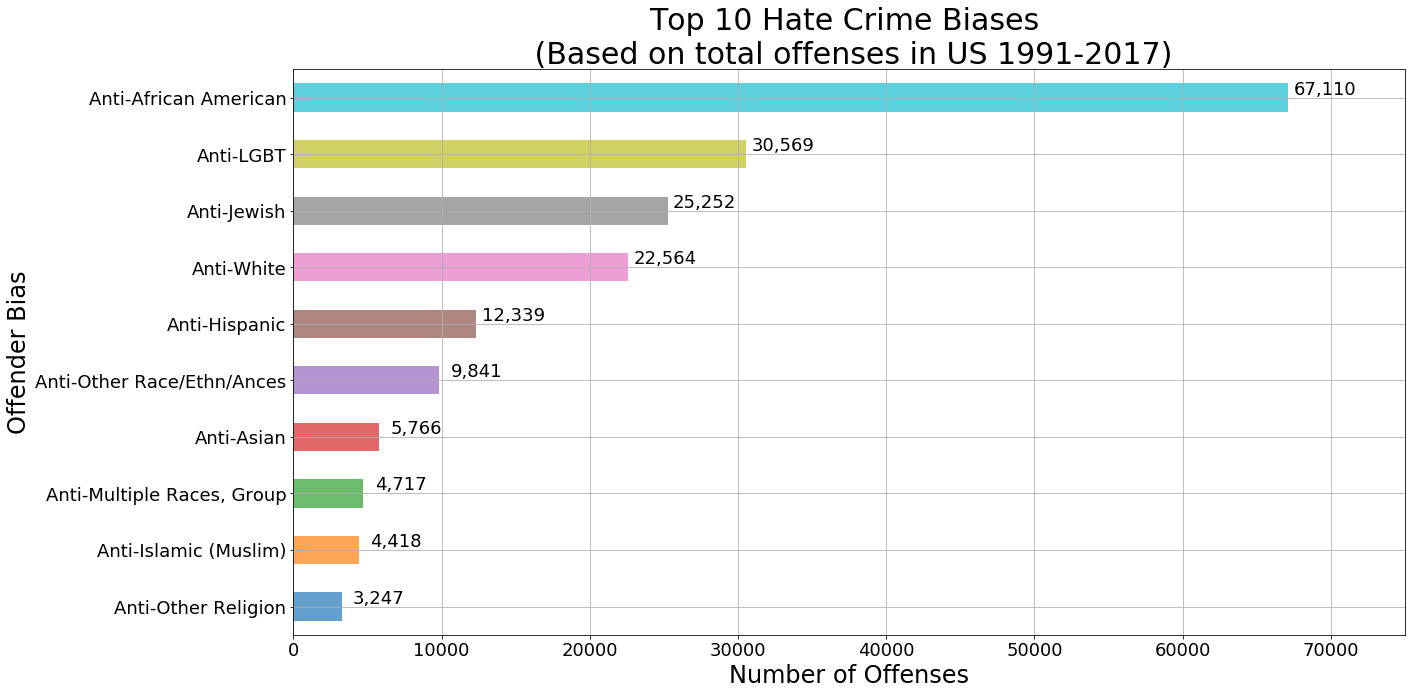

In [37]:
ax = bias_by_type_t10sorted.plot(kind='barh', align='center', alpha=0.7)
plt.title('Top 10 Hate Crime Biases \n (Based on total offenses in US 1991-2017)', fontsize=30)
plt.xlabel('Number of Offenses', fontsize=24)
plt.ylabel('Offender Bias', fontsize=24, rotation=90) 
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.grid()
for p in ax.patches:
    width = p.get_width()
    plt.text(2500+p.get_width(), p.get_y()+0.8*p.get_height(),
             '{:1,}'.format(width),
             ha='center', va='center')
    plt.rc('font', size=18) 
    
plt.xlim(0,75000)
plt.tight_layout()
plt.savefig('t10_hate_crime_bias_sort.png')
plt.show()

In [41]:
bias_by_type_t10perc_sorted = bias_by_type_t10perc.sort_values(ascending=True)
bias_by_type_t10perc_sorted

BIAS_DESC
Anti-Other Religion           0.017474
Anti-Islamic (Muslim)         0.023775
Anti-Multiple Races, Group    0.025384
Anti-Asian                    0.031030
Anti-Other Race/Ethn/Ances    0.052959
Anti-Hispanic                 0.066402
Anti-White                    0.121427
Anti-Jewish                   0.135893
Anti-LGBT                     0.164506
Anti-African American         0.361150
Name: REGION_NAME, dtype: float64

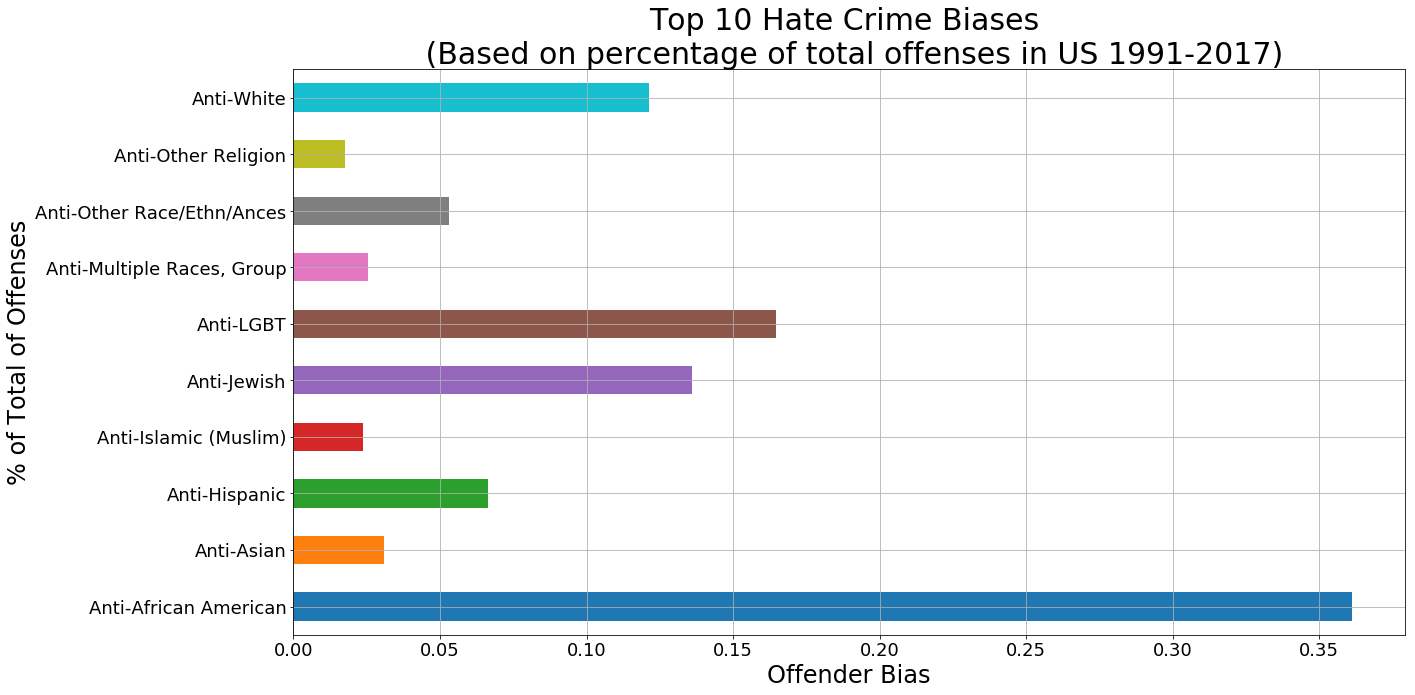

In [42]:
hate_crime_chart = bias_by_type_t10perc.plot(kind='barh')
plt.title('Top 10 Hate Crime Biases \n (Based on percentage of total offenses in US 1991-2017)', fontsize=30) 
hate_crime_chart.set_xlabel("Offender Bias", fontsize=24)
hate_crime_chart.set_ylabel("% of Total of Offenses", fontsize=24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)

plt.grid()
plt.tight_layout()
plt.savefig('t10perc_offences_by_bias.png')
plt.show()

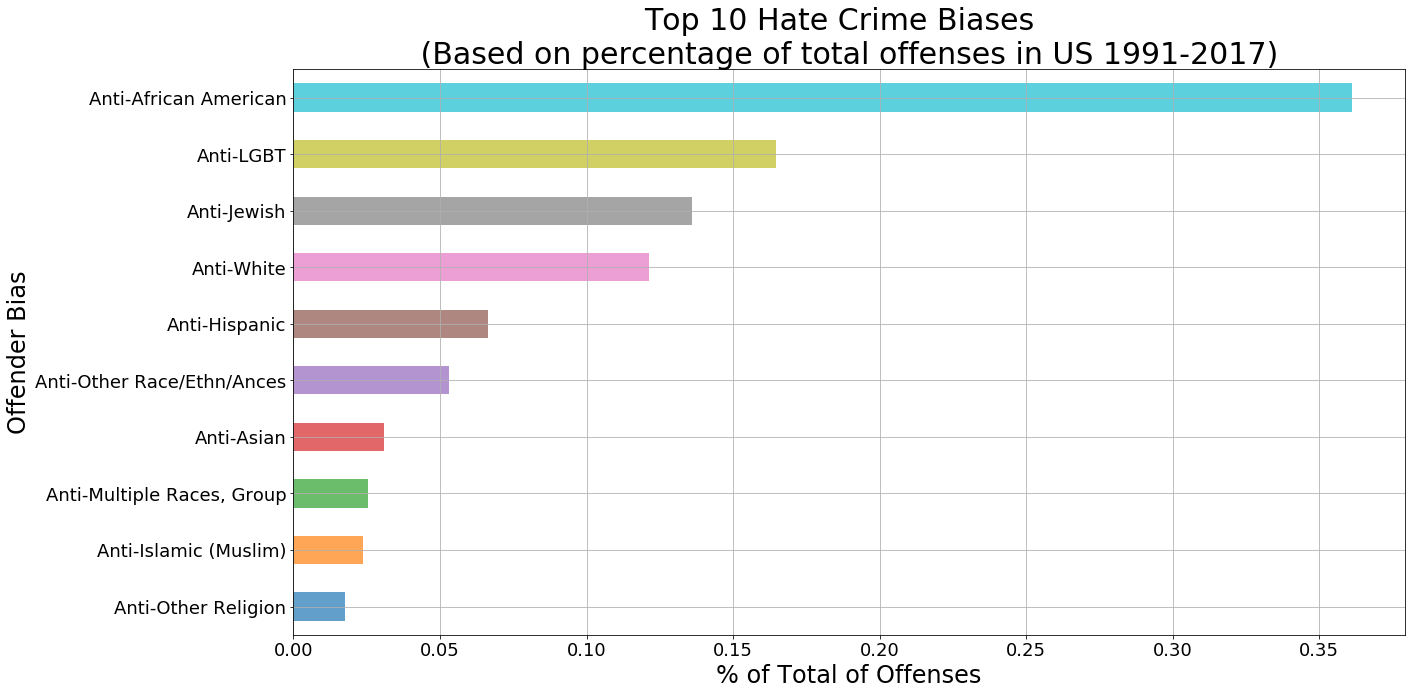

In [43]:

bias_by_type_t10perc_sorted.plot(kind='barh', align='center', alpha=0.7)
plt.title('Top 10 Hate Crime Biases  \n (Based on percentage of total offenses in US 1991-2017) ', fontsize=30)
plt.xlabel('% of Total of Offenses', fontsize=24)
plt.ylabel('Offender Bias', fontsize=24, rotation=90) 
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.grid()

plt.tight_layout()
plt.savefig('t10perc_hate_crime_bias_sort.png')
plt.show()

In [44]:
bias_by_type_t10perc = (hate_crime_bias_t10.groupby(
    ["BIAS_DESC"]).count()["REGION_NAME"] / hate_crime_bias_t10["BIAS_DESC"].count())

bias_by_type_t10perc = bias_by_type_t10perc

bias_by_type_t10perc

BIAS_DESC
Anti-African American         0.361150
Anti-Asian                    0.031030
Anti-Hispanic                 0.066402
Anti-Islamic (Muslim)         0.023775
Anti-Jewish                   0.135893
Anti-LGBT                     0.164506
Anti-Multiple Races, Group    0.025384
Anti-Other Race/Ethn/Ances    0.052959
Anti-Other Religion           0.017474
Anti-White                    0.121427
Name: REGION_NAME, dtype: float64

In [45]:
bias_by_type_t10perc_sorted = bias_by_type_t10perc.sort_values(ascending=True)

bias_by_type_t10perc_sorted

BIAS_DESC
Anti-Other Religion           0.017474
Anti-Islamic (Muslim)         0.023775
Anti-Multiple Races, Group    0.025384
Anti-Asian                    0.031030
Anti-Other Race/Ethn/Ances    0.052959
Anti-Hispanic                 0.066402
Anti-White                    0.121427
Anti-Jewish                   0.135893
Anti-LGBT                     0.164506
Anti-African American         0.361150
Name: REGION_NAME, dtype: float64

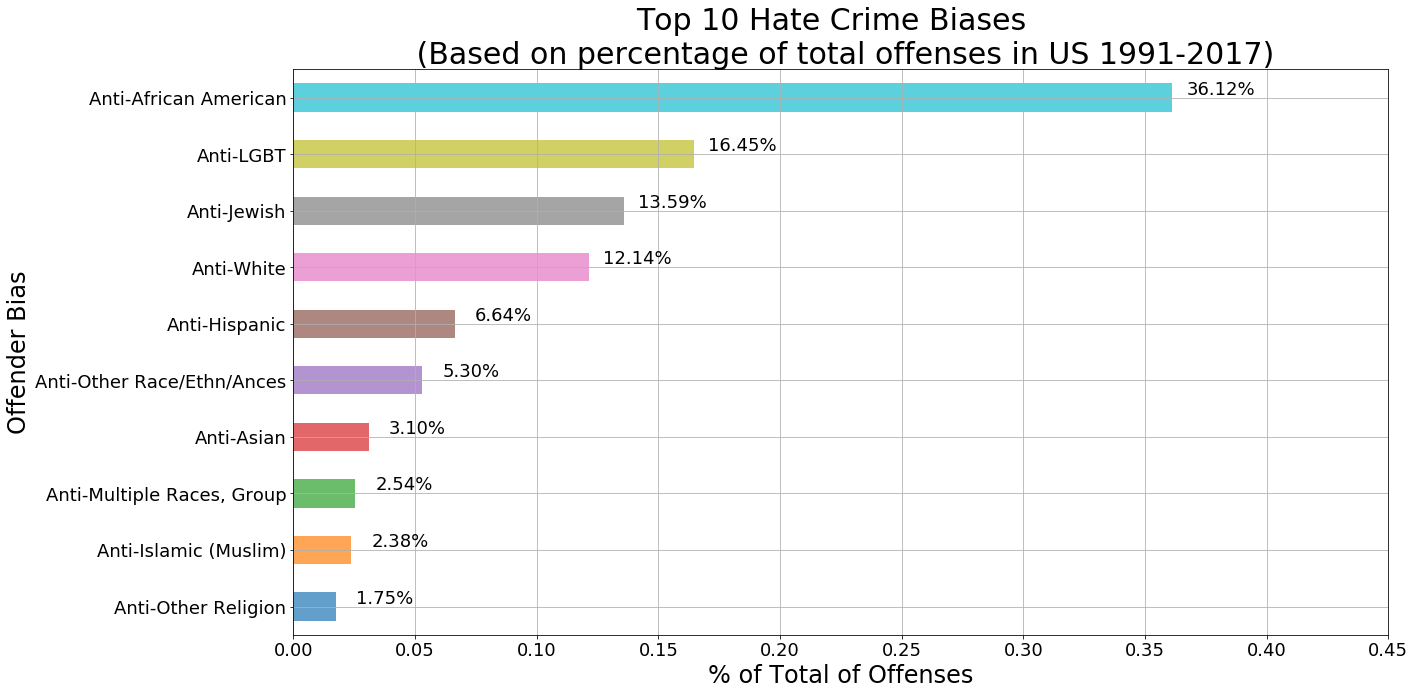

In [46]:
axp = bias_by_type_t10perc_sorted.plot(kind='barh', align='center', alpha=0.7)
plt.title('Top 10 Hate Crime Biases  \n (Based on percentage of total offenses in US 1991-2017)', fontsize=30)
plt.xlabel('% of Total of Offenses', fontsize=24)
plt.ylabel('Offender Bias', fontsize=24, rotation=90) 
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.grid()

for p in axp.patches:
    width = p.get_width()
    plt.text(.02+p.get_width(), p.get_y()+0.8*p.get_height(),
             '{:.2%}'.format(width),
             ha='center', va='center')
    plt.rc('font', size=18) 

plt.xlim(0,.45)

plt.tight_layout()
plt.savefig('t10perc_hate_crime_bias_sort.png')
plt.show()

In [47]:
bias_by_type_t5 = hate_crime_bias_t5.groupby("BIAS_DESC")["REGION_NAME"].count()
bias_by_type_t5

BIAS_DESC
Anti-African American    67110
Anti-Hispanic            12339
Anti-Jewish              25252
Anti-LGBT                30569
Anti-White               22564
Name: REGION_NAME, dtype: int64

In [48]:
bias_by_type_t5perc = 100 * hate_crime_bias_t5.groupby(
    ["BIAS_DESC"]).count()["REGION_NAME"] / hate_crime_bias_t5["BIAS_DESC"].count()
bias_by_type_t5perc

BIAS_DESC
Anti-African American    42.519356
Anti-Hispanic             7.817707
Anti-Jewish              15.999088
Anti-LGBT                19.367817
Anti-White               14.296033
Name: REGION_NAME, dtype: float64

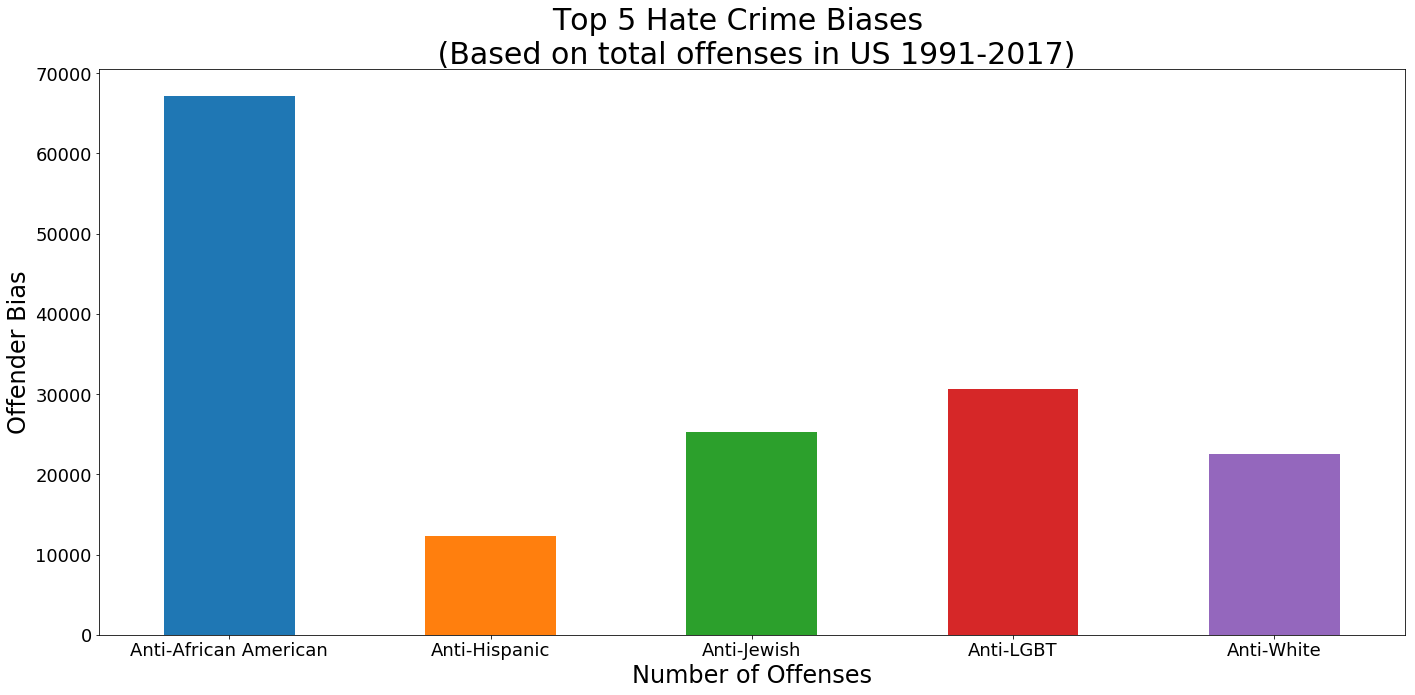

In [49]:
hate_crime_chart = bias_by_type_t5.plot(kind='bar')
plt.title('Top 5 Hate Crime Biases   \n (Based on total offenses in US 1991-2017)', fontsize=30)
plt.xlabel('Number of Offenses', fontsize=24)
plt.ylabel('Offender Bias', fontsize=24, rotation=90) 
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)

plt.tight_layout()
plt.savefig('t5_offences_by_bias.png')
plt.show()

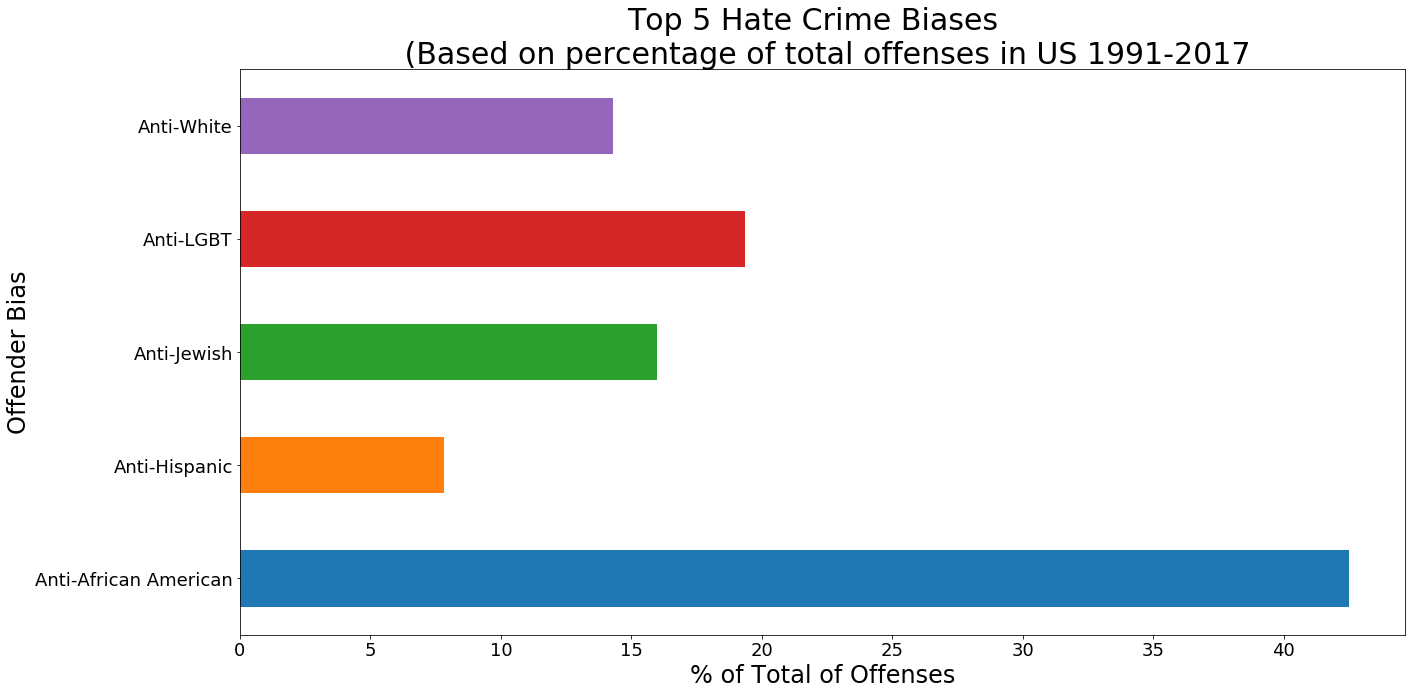

In [50]:
hate_crime_chart = bias_by_type_t5perc.plot(kind='barh')
plt.title('Top 5 Hate Crime Biases  \n (Based on percentage of total offenses in US 1991-2017', fontsize=30)
plt.xlabel('% of Total of Offenses', fontsize=24)
plt.ylabel('Offender Bias', fontsize=24, rotation=90) 
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)

plt.tight_layout()
plt.savefig('t5perc_offences_by_bias.png')
plt.show()

In [51]:
hate_crime_bias_South_t10=hate_crime_bias_t10.loc[hate_crime_bias_t10['REGION_NAME'] == "South"]
hate_crime_bias_West_t10=hate_crime_bias_t10.loc[hate_crime_bias_t10['REGION_NAME'] == "West"]
hate_crime_bias_Northeast_t10=hate_crime_bias_t10.loc[hate_crime_bias_t10['REGION_NAME'] == "Northeast"]
hate_crime_bias_Midwest_t10=hate_crime_bias_t10.loc[hate_crime_bias_t10['REGION_NAME'] == "Midwest"]

In [52]:
hate_crime_bias_South_t5=hate_crime_bias_t5.loc[hate_crime_bias_t5['REGION_NAME'] == "South"]
hate_crime_bias_West_t5=hate_crime_bias_t5.loc[hate_crime_bias_t5['REGION_NAME'] == "West"]
hate_crime_bias_Northeast_t5=hate_crime_bias_t5.loc[hate_crime_bias_t5['REGION_NAME'] == "Northeast"]
hate_crime_bias_Midwest_t5=hate_crime_bias_t5.loc[hate_crime_bias_t5['REGION_NAME'] == "Midwest"]

In [53]:
hate_crime_bias_South_t10

,DATA_YEAR,ORI,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR0040200,Rogers,AR,Arkansas,West South Central,South,31-Aug-91,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-African American,Individual
1,1991,AR0290100,Hope,AR,Arkansas,West South Central,South,19-Sep-91,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,4-Jul-91,Aggravated Assault,Residence/Home,Anti-African American,Individual
3,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,24-Dec-91,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,23-Dec-91,Aggravated Assault,Service/Gas Station,Anti-White,Individual
5,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,27-Jul-91,Robbery,Grocery/Supermarket,Anti-White,Individual
6,1991,AR0600200,Little Rock,AR,Arkansas,West South Central,South,14-Nov-91,Aggravated Assault,School/College,Anti-White,Individual
7,1991,AR0600300,North Little Rock,AR,Arkansas,West South Central,South,10-Jul-91,Aggravated Assault;Murder and Nonnegligent Man...,Residence/Home,Anti-White,Individual
8,1991,AR0600300,North Little Rock,AR,Arkansas,West South Central,South,6-Oct-91,Intimidation,Residence/Home,Anti-White,Individual
9,1991,AR0600300,North Little Rock,AR,Arkansas,West South Central,South,4-Oct-91,Robbery,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual


In [54]:
hate_crime_bias_South_t10.count()

DATA_YEAR          37576
ORI                37576
PUB_AGENCY_NAME    37576
STATE_ABBR         37576
STATE_NAME         37576
DIVISION_NAME      37576
REGION_NAME        37576
INCIDENT_DATE      37576
OFFENSE_NAME       37576
LOCATION_NAME      37576
BIAS_DESC          37576
VICTIM_TYPES       37576
dtype: int64

In [55]:
print(bias_list_t10)

['Anti-African American', 'Anti-LGBT', 'Anti-Jewish', 'Anti-White', 'Anti-Hispanic', 'Anti-Other Race/Ethn/Ances', 'Anti-Asian', 'Anti-Multiple Races, Group', 'Anti-Islamic (Muslim)', 'Anti-Other Religion']


In [56]:
top_bias_by_state=hate_crime_bias_t10.groupby(['STATE_ABBR', 'BIAS_DESC'])[['ORI']].count() \
                                .reset_index() \
                                .rename(columns={'ORI':'Count'}) \
                                .sort_values(['STATE_ABBR', 'Count'], ascending=False) \
                                .groupby('STATE_ABBR')['BIAS_DESC'].apply(list) \
                                .reset_index() \
                                .rename(columns={'BIAS_DESC':'TOP_10_BIAS'}) 

In [57]:
top_bias_by_state['TOP_5_BIAS'] = top_bias_by_state['TOP_10_BIAS'].str[0:5]
top_bias_by_state.head()

,STATE_ABBR,TOP_10_BIAS,TOP_5_BIAS
0,AK,"[Anti-African American, Anti-LGBT, Anti-White,...","[Anti-African American, Anti-LGBT, Anti-White,..."
1,AL,"[Anti-African American, Anti-White, Anti-LGBT,...","[Anti-African American, Anti-White, Anti-LGBT,..."
2,AR,"[Anti-White, Anti-African American, Anti-LGBT,...","[Anti-White, Anti-African American, Anti-LGBT,..."
3,AZ,"[Anti-African American, Anti-LGBT, Anti-Hispan...","[Anti-African American, Anti-LGBT, Anti-Hispan..."
4,CA,"[Anti-African American, Anti-LGBT, Anti-Jewish...","[Anti-African American, Anti-LGBT, Anti-Jewish..."


In [58]:
top_bias_by_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
STATE_ABBR     51 non-null object
TOP_10_BIAS    51 non-null object
TOP_5_BIAS     51 non-null object
dtypes: object(3)
memory usage: 1.3+ KB


In [59]:
hate_crime_bias_Black=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-African American"]
hate_crime_bias_LGBT=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-LGBT"]
hate_crime_bias_Jewish=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-Jewish"]
hate_crime_bias_White=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-White"]
hate_crime_bias_Hispanic=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-Hispanic or Latino"]
hate_crime_bias_OtherRace=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-Other Race/Ethnicity/Ancestry"]
hate_crime_bias_Asian=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-Asian"]
hate_crime_bias_MultRaces=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-Multiple Races, Group"]
hate_crime_bias_Islamic=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-Islamic (Muslim)"]
hate_crime_bias_OtherRelig=hate_crime_bias_t10.loc[hate_crime_bias_t10['BIAS_DESC'] == "Anti-Other Religion"]

In [60]:
hate_crime_bias_Black.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR0040200,Rogers,AR,Arkansas,West South Central,South,31-Aug-91,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-African American,Individual
2,1991,AR0350100,Pine Bluff,AR,Arkansas,West South Central,South,4-Jul-91,Aggravated Assault,Residence/Home,Anti-African American,Individual
11,1991,AR0670000,Sevier,AR,Arkansas,West South Central,South,14-Oct-91,Intimidation,School/College,Anti-African American,Individual
12,1991,AZ0072300,Phoenix,AZ,Arizona,Mountain,West,15-Jan-91,Intimidation,Residence/Home,Anti-African American,Individual
15,1991,AZ0072300,Phoenix,AZ,Arizona,Mountain,West,4-Feb-91,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-African American,Individual


In [61]:
hate_crime_count = hate_crime_bias_t10.groupby("STATE_ABBR")['ORI'] \
                                .count() \
                                .to_frame() \
                                .reset_index() \
                                .rename(columns={'ORI': 'Crime_Count'})
hate_crime_count.head()

,STATE_ABBR,Crime_Count
0,AK,160
1,AL,187
2,AR,944
3,AZ,5855
4,CA,32007


In [62]:
combined_df = pd.merge(hate_crime_count, top_bias_by_state, on='STATE_ABBR')
combined_df.head()

,STATE_ABBR,Crime_Count,TOP_10_BIAS,TOP_5_BIAS
0,AK,160,"[Anti-African American, Anti-LGBT, Anti-White,...","[Anti-African American, Anti-LGBT, Anti-White,..."
1,AL,187,"[Anti-African American, Anti-White, Anti-LGBT,...","[Anti-African American, Anti-White, Anti-LGBT,..."
2,AR,944,"[Anti-White, Anti-African American, Anti-LGBT,...","[Anti-White, Anti-African American, Anti-LGBT,..."
3,AZ,5855,"[Anti-African American, Anti-LGBT, Anti-Hispan...","[Anti-African American, Anti-LGBT, Anti-Hispan..."
4,CA,32007,"[Anti-African American, Anti-LGBT, Anti-Jewish...","[Anti-African American, Anti-LGBT, Anti-Jewish..."


In [63]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df = combined_df

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [
    [0.0, 'rgb(225, 245, 254)'],
    [1.0, 'rgb(13, 71, 161)']
]

# tooltip
df['text'] = 'The top 5 hate crime biases against victims in ' + df['STATE_ABBR'] +':' + '<br>' + df['TOP_5_BIAS']


data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df['STATE_ABBR'],
    z = df['Crime_Count'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Offense Count")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'US Hate Crimes by State (1991-2017) <br>(Hover for State Crime Count and Bias breakout)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(176,196,222)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'US_Hate_Crime Biases_by_State_USMap.png')
# pio.write_image(fig, 'US_Hate_Crime Biases_by_State_USMap.png')

C:\Users\beveloff\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

